# 배열의 형태(shape) 변경

## reshape()을 이용한 차원 변경


numpy.reshape(a, newshape)

nparray.reshape(newshape)

  - a: 형태를 변경할 배열
  - newshape : 변경할 형태 설정. 
  - 원소의 개수를 유지하는 shape으로만 변환 가능하다.

In [1]:
## . 1차원과 2차원 변환

import numpy as np
a = [1,2,3,4,5,6,7,8]
b = np.reshape(a,(2,4))
c = np.reshape(a,(4,2))
print(b)
print('\n')
print(c)

[[1 2 3 4]
 [5 6 7 8]]


[[1 2]
 [3 4]
 [5 6]
 [7 8]]


In [2]:
#3차원 변환

a = np.arange(1,9)
b = a.reshape(2,2,2)
b

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

In [4]:
#reshape에서 -1의 의미 : “원래 배열의 길이와 남은 차원으로 부터 추정”

x = np.arange(12)
x = x.reshape(3,4)

print(x.reshape(-1,1))

print(x.reshape(-1,2))

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]]
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]]


### 수업

In [5]:
import numpy as np

x = np.arange(20)
print(x.shape)
x

(20,)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [10]:
r1 = np.reshape(x,(4,5)) #shape이 변경된 배열을 반환

print(r1.shape)
r1

(4, 5)


array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [11]:
np.reshape(x,(2,5)) #size가 20 -> 10 (변경 후 사이즈가 다르면 안됨)

ValueError: cannot reshape array of size 20 into shape (2,5)

In [16]:
r2 = x.reshape((4,-1)) #축의 size들을 지정하고 나머지 한축에 -1을 주면 원소수에 맞춰 알아서 처리

r2

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [17]:
r3 = x.reshape(4,5)

print(r3.shape)

r3

(4, 5)

In [19]:
r4 =x.reshape(4,5,-1)

print(r4.shape)

r4

(4, 5, 1)


array([[[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4]],

       [[ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9]],

       [[10],
        [11],
        [12],
        [13],
        [14]],

       [[15],
        [16],
        [17],
        [18],
        [19]]])

In [21]:
r5 = x.reshape(-1,4,5)

print(r5.shape)

r5

(1, 4, 5)


array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]]])

## 차원 늘리기(확장)

### numpy.newaxis 이용해 차원 늘리기
- size가 1인 rank를 늘릴때 사용한다. 
    - 지정한 axis에 size 1인 축을 추가한다.
- slicing에 사용하거나 indexing에 `...`과 같이 사용한다.
    - slicing의 경우 원하는 위치의 축을 늘릴 수 있다.
    - index에 ...과 사용하는 경우 첫번째나 마지막 축을 늘릴때 사용한다.


In [22]:
x = np.arange(6)

x.shape

(6,)

In [23]:
x[:]

array([0, 1, 2, 3, 4, 5])

In [26]:
y = x[:,np.newaxis] #reshape(6,-1)


print(y.shape)

y

(6, 1)


array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [28]:
y2 = x[np.newaxis,:]

print(y2.shape)

y2

(1, 6)


array([[0, 1, 2, 3, 4, 5]])

In [31]:
y3 = y2[:,:,np.newaxis]

print(y3.shape)

y3

(1, 6, 1)


array([[[0],
        [1],
        [2],
        [3],
        [4],
        [5]]])

In [35]:
x2 = np.arange(12).reshape(3,4)

x2.shape

(3, 4)

In [37]:
y4 = x2[:,np.newaxis,:,np.newaxis] #3,1,4

print(y4.shape)

y4

(3, 1, 4, 1)


array([[[[ 0],
         [ 1],
         [ 2],
         [ 3]]],


       [[[ 4],
         [ 5],
         [ 6],
         [ 7]]],


       [[[ 8],
         [ 9],
         [10],
         [11]]]])

In [39]:
# (3,1,4,1) => (1,3,1,4,1)

# y5 = y4[np.newaxis,:,:,:,:]

y5 = y4[np.newaxis,:,:,:,:] #0번 축이나 마지막 축을 늘리는 경우 ... 사용

y5.shape

(1, 3, 1, 4, 1)

In [40]:
y6 = y4[..., np.newaxis]

y6.shape

(3, 1, 4, 1, 1)

 ### numpy.expand_dims (배열, axis)

- 매개변수로 받은 배열에 지정한 axis의 rank를 확장한다.

In [43]:
# x.expand.dims(axis =1)
y7 = np.expand_dims(x, axis = 1) #x[...,np.newaxis]

y7.shape

(6, 1)

## reshape vs newaxis ?

reshape는 변환전 차원의 합과 변환후 차원의 합이 같아야 합니다.

 (4,1)을 변환한다는 기준으로 (2,2)는 reshape 가능한데 (4,1)을 (3,3)으로 부꿀수는 없다는 게 제약이 있는 거죠.

 newaxis = None

 

그리고 newaxis는 None과 같습니다.

 

newaxis가 생각 안나면 None을 써도 무방하다는 이야기 입니다..

In [42]:
# x.expand.dims(axis =1)
y7 = np.expand_dims(x, axis = 1) #x[...,np.newaxis]

y7.shape

(6, 1)

### 차원 줄이기(축소)

#### numpy.squeeze(배열, axis=None), 배열객체.squeeze(axis=None)

##### size:1인 경우 줄일 때

- 배열에서 지정한 축(axis)을 제거하여 차원(rank)를 줄인다.
- 제거하려는 축의 size는 1이어야 한다.
- 축을 지정하지 않으면 size가 1인 모든 축을 제거한다.
    - (3,1,1,2) => (3,2)
    
### 배열객체.flatten()
- 다차원 배열을 1차원으로 만든다.

In [44]:
y6.shape

(3, 1, 4, 1, 1)

In [48]:
y8 = np.squeeze(y6)

y8.shape

(3, 4)

In [50]:
#다차원을 1차원으로 만든다.

y6.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [51]:
y8.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

### 벡터 연산 - 벡터화(vectorization)

#### https://velog.io/@mingki/Numpy-%EC%97%B0%EC%82%B0

#####  shape이 같은 애들끼리만 더할 수 있다.

- 같은 형태(shape)의 배열(벡터, 행렬)간의 연산은 같은 index의 원소끼리 연산을 한다. 
    - **Element-wise(원소별) 연산** 이라고도 한다.
    - 배열간의 연산시 배열의 형태가 같아야 한다.
    - 배열의 형태가 다른 경우 Broadcast 조건을 만족하면 연산이 가능하다.

### 벡터/행렬과 스칼라간 연산

$$
\begin{align}
x=
\begin{bmatrix}
1 \\
2 \\
3 \\
\end{bmatrix}
\end{align}
$$

$$
\begin{align}
10 - x = 10 -
\begin{bmatrix}
1 \\
2 \\
3 \\
\end{bmatrix}
=
\begin{bmatrix}
10 - 1 \\
10 - 2 \\
10 - 3 \\
\end{bmatrix}
=
\begin{bmatrix}
9 \\
8 \\
7 \\
\end{bmatrix}
\end{align}
$$

In [52]:
x = np.array([1,2,3])

print(10-x)

[9 8 7]


In [55]:
x = np.array([1,2,3])

print(10-x)
print(10*x)
print(10/x)
print(10 > x)

[9 8 7]
[10 20 30]
[10.          5.          3.33333333]
[ True  True  True]


In [56]:
y = np.arange(9).reshape(3,3)

y.shape
y

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [57]:
10 - y

array([[10,  9,  8],
       [ 7,  6,  5],
       [ 4,  3,  2]])

In [58]:
print(y>5)

[[False False False]
 [False False False]
 [ True  True  True]]


### 벡터/행렬 간의 연산
$$
\begin{align}
\begin{bmatrix}
1 \\
2 \\
3 \\
\end{bmatrix}
+
\begin{bmatrix}
10 \\
20 \\
30 \\
\end{bmatrix}
=
\begin{bmatrix}
1 + 10 \\
2 + 20 \\
3 + 30 \\
\end{bmatrix}
=
\begin{bmatrix}
11 \\
22 \\
33 \\
\end{bmatrix}
\end{align}
$$

$$
\begin{align}
\begin{bmatrix}
1 \\
2 \\
3 \\
\end{bmatrix}
-
\begin{bmatrix}
10 \\
20 \\
30 \\
\end{bmatrix}
=
\begin{bmatrix}
1 - 10 \\
2 - 20 \\
3 - 30 \\
\end{bmatrix}
=
\begin{bmatrix}
-9 \\
-18 \\
-27 \\
\end{bmatrix}
\end{align}
$$

In [59]:
x = np.array([1,2,3])

y = np.array([10,-20,30])

x+y

array([ 11, -18,  33])

In [61]:
a = np.arange(10).reshape(2,5)

b = np.arange(10,20).reshape(2,5)

print(a)

print(b)

[[0 1 2 3 4]
 [5 6 7 8 9]]
[[10 11 12 13 14]
 [15 16 17 18 19]]


In [62]:
a+b

array([[10, 12, 14, 16, 18],
       [20, 22, 24, 26, 28]])

In [63]:
a>b

array([[False, False, False, False, False],
       [False, False, False, False, False]])

In [65]:
x * y

array([ 10, -40,  90])

## 내적 (Dot product)
- `@` 연산자 또는 `numpy.dot(벡터/행렬, 벡터/행렬)`  함수 사용
- ### 벡터간의 내적
    - 같은 index의 원소끼리 곱한뒤 결과를 모두 더한다.
    - 벡터간의 내적의 결과는 스칼라가 된다.
    - $ x \cdot y $ 또는 $x^T y$로 표현
    - 조건
        - 두 벡터의 차원(원소의개수)가 같아야 한다.
        - 앞의 벡터는 행벡터 뒤의 벡터는 열벡터 이어야 한다.
            - numpy 에서는 vector 끼리 연산시 앞의 벡터는 행벡터로 뒤의 벡터는 열벡터로 인식해 처리한다.

### 행렬간의 내적
- 앞 행렬의 행과 뒤 행렬의 열간에 내적을 한다.
- 행렬과 행렬을 내적하면 그 결과는 행렬이 된다.
- 앞 행렬의 열수와 뒤 행렬의 행수가 같아야 한다.
- 내적의 결과의 형태(shape)는 앞행렬의 행수와 뒤 행렬의 열의 형태를 가진다.
    - (3 x 2)와 (2 x 5) = (3 x 5)
    - (1 x 5)와 (5 x 1) = (1 x 1) 상수    

In [66]:
A = np.arange(1,7).reshape(2,3)

B = np.arange(1,7).reshape(3,2)

print(A.shape, B.shape)

(2, 3) (3, 2)


In [67]:
A@B

array([[22, 28],
       [49, 64]])

In [68]:
np.dot(A,B)

array([[22, 28],
       [49, 64]])

In [69]:
x = np.array([1,2,3])

y = np.array([4,5,6])



In [70]:
x@y, np.dot(x,y)

(32, 32)

### 내적의 예
#### 가중합 
가격: 사과 2000, 귤 1000, 수박 10000    
개수: 사과 10, 귤 20, 수박 2    
총가격?    
2000*10 + 1000 * 20 + 10000 * 2

In [71]:
price = np.array([2000,1000,10000])

amt = np.array([10,20,2])

price @ amt

60000

In [74]:
amts = np.array([[10,20,2], [5,10,30],[20,5,5]])


amts

array([[10, 20,  2],
       [ 5, 10, 30],
       [20,  5,  5]])

## 기술통계함수
- 통계 결과를 계산해 주는 함수들
- 구문
    1. `np.전용함수(배열)`
        - np.sum(x)
    2. 일부는 `배열.전용함수()` 구문 지원
        - x.sum()
- 배열의 원소 중 누락된 값(NaN - Not a Number) 있을 경우 연산의 결과는 NaN으로 나온다.        
- 안전모드 함수
    - 배열내 누락된 값(NaN)을 무시하고 계산
        
- https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.statistics.html

In [76]:
arr = np.random.randint(100,size=(10))

arr

array([62,  1, 35, 13, 47, 83, 70, 60, 29, 13])

In [77]:
np.sum(arr),arr.sum()

(413, 413)

In [78]:
arr2 = np.arange(1,11)

arr2 = np.random.permutation(arr2)

arr2

array([ 8,  7,  2,  1,  4, 10,  5,  3,  6,  9])

In [80]:
np.median(arr2)

5.5

In [81]:
np.quantile(arr2,q=[0.25,0.5, 0.75])

array([3.25, 5.5 , 7.75])

In [83]:
import matplotlib.pyplot as plt

import seaborn as sns

In [84]:
plt.figure(figsize = (7,7))

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

C:\Users\Playdata\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Playdata\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:>

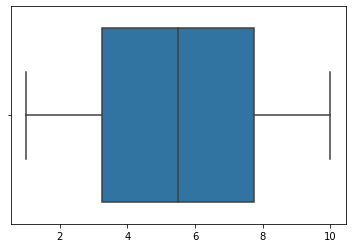

In [85]:
sns.boxplot(arr2, orient = 'v')

In [87]:
x = np.array([100,80,90,50,100,np.nan]) #np.nan : 결측치

#전체에 대한 평균 값 구할 때 0으로 바꾸던가 해야됨

x.sum(), x.mean(), x.var(), x.max(), x.min(), x.argmax(), x.argmin()

(nan, nan, nan, nan, nan, 5, 5)

In [88]:
x2 = np.arange(1,7).reshape(2,3)
x2

array([[1, 2, 3],
       [4, 5, 6]])

# 브로드 캐스팅
- 사전적의미 : 퍼트린다. 전파한다. 
- 형태(shape)가 다른 배열 연산시 배열의 형태를 맞춰 연산이 가능하도록 한다.
    - 모든 형태를 다 맞추는 것은 아니고 조건이 맞아야 한다.
- 조건
    1. 두 배열의 축의 개수가 다르면 작은 축의개수를 가진 배열의 형태(shape)의 앞쪽을 1로 채운다.
        - (2, 3)  + (3, ) => (2, 3) + (1, 3)
    2. 두 배열의 차원 수가 같지만 각 차원의 크기가 다른 경우 어느 한 쪽에 1이 있으면 그 1이 다른 배열의 크기와 일치하도록 늘어난다.
         - 1 이외의 나머지 축의 크기는 같아야 한다.
         - 늘리면서 원소는 복사한다.
         - (2, 3) + (1, 3) => (2, 3)+(2, 3)

